## Introduction

This project aims to make an EDA of diamond prices and apply a predictive model for the price.

## EDA

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


diamond = sns.load_dataset('diamonds')
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
sns.set_palette("winter")
sns.set_style("darkgrid")

# Functions

In [ ]:
def catplot_by_price(col):
  sns.catplot(x = col, y = "price", data = diamond, kind = 'bar', aspect = 2)

In [ ]:
def count(col):
  counts = diamond[col].value_counts()
  print(counts)
  return None

In [ ]:
def plot_quantity(data, col):
  ax = sns.set(rc = {'figure.figsize': (10, 6)})
  order = data[col].value_counts().index
  ax = sns.countplot(x = col, data = data, order = order)
  ax.set_title('Quantity of diamonds by {}'.format(col), fontsize = 16)
  ax.set_xlabel(f'{col}', fontsize = 14)
  ax.set_ylabel('Quantity', fontsize = 14)
  ax = ax
  return ax

In [ ]:
def quantity_diamonds_by_(data, col, hue):

  ax = sns.set(rc = {'figure.figsize': (10, 6)})
  ax = sns.countplot(x = col, data = data, hue = hue)
  ax.set_title('Number of diamonds by {} and {} distribution'.format(col, hue), fontsize = 16)
  ax.set_xlabel('Clarity', fontsize = 14)
  ax.set_ylabel('Quantity', fontsize = 14)
  ax = ax

  return ax

In [ ]:
def mean_price_by_cathegory(data, col):

  mean_price_by_cathegory = data.groupby([col]).mean().price.round(2).sort_values(ascending = False).reset_index()
  mean_price_by_cathegory = pd.DataFrame(mean_price_by_cathegory)
  mean_price_by_cathegory.rename(columns = {'price':'mean price'}, inplace = True)
  mean_price_by_cathegory
  
  return mean_price_by_cathegory

In [ ]:
def median_price_by_cathegory(data, col):

  median_price_by_cathegory = data.groupby([col]).median().price.round(2).sort_values(ascending = False).reset_index()
  median_price_by_cathegory = pd.DataFrame(median_price_by_cathegory)
  median_price_by_cathegory.rename(columns = {'price':'median price'}, inplace = True)
  median_price_by_cathegory
  
  return median_price_by_cathegory

In [ ]:
def std_price_by_cathegory(data, col):

  std_price_by_clarity = data.groupby([col]).std().price.round(2).sort_values(ascending = False).reset_index()
  std_price_by_clarity = pd.DataFrame(std_price_by_clarity)
  std_price_by_clarity.rename(columns = {'price':'std of price'}, inplace = True)
  std_price_by_clarity

  return std_price_by_clarity

# Description of dataset features

Carat : Diamond weight in carats (1 carat = 2 grams)

Cut : Describes the quality of the diamond's cut. Quality increases in order: Fair, Good, Very Good, Premium, Ideal.

Color : Color of the diamond, with D being the best and J being the worst.

Clarity: Diamond clarity refers to the lack of flaws and imperfections.

Depth : The height of the diamond.

Depth: The height of the diamond, measured from the culet (a culet is a flat face on the bottom of a gemstone) to the table, divided by the average girdle diameter. In circular diamonds, there is not one that is perfectly round. Therefore, each diameter is not the same and therefore the average value is taken.

Table : The width of the diamond expressed as a percentage of its average diameter.

Price : Diamond price in dollars.

X : Diamond width in millimeters.

Y : Height of the diamond in millimeters.

Z : Diamond length in millimeters.

## Dataset description

In [ ]:
diamond.shape

(53940, 10)

In [ ]:
print('The dataset has {} rows and {} columns.'.format(diamond.shape[0], diamond.shape[1]))
print('There are 5 different diamond cuts: {}, {}, {}, {} e {}.'.format(diamond['cut'].unique()[0], diamond['cut'].unique()[1],
                                                                                          diamond['cut'].unique()[2], diamond['cut'].unique()[3],
                                                                                          diamond['cut'].unique()[4]))
print('There are 7 colors of diamonds: {}, {}, {}, {}, {}, {}, {}.'.format(diamond['color'].unique()[0], diamond['color'].unique()[1], diamond['color'].unique()[2],
                                                                    diamond['color'].unique()[3], diamond['color'].unique()[4], diamond['color'].unique()[5],
                                                                    diamond['color'].unique()[6]))
print('There are 8 clarity variations: {}, {}, {}, {}, {}, {}, {}, {}.'.format(diamond['clarity'].unique()[0], diamond['clarity'].unique()[1],
                                                                                 diamond['clarity'].unique()[2], diamond['clarity'].unique()[3],
                                                                                 diamond['clarity'].unique()[4], diamond['clarity'].unique()[5],
                                                                                 diamond['clarity'].unique()[6], diamond['clarity'].unique()[7]))

The dataset has 53940 rows and 10 columns.
There are 5 different diamond cuts: Ideal, Premium, Good, Very Good e Fair.
There are 7 colors of diamonds: E, I, J, H, F, G, D.
There are 8 clarity variations: SI2, SI1, VS1, VS2, VVS2, VVS1, I1, IF.


In [ ]:
description = diamond.describe().round(2)
description

,carat,depth,table,price,x,y,z
count,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00
mean,0.80,61.75,57.46,3932.80,5.73,5.73,3.54
std,0.47,1.43,2.23,3989.44,1.12,1.14,0.71
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,950.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,62.50,59.00,5324.25,6.54,6.54,4.04
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


It is possible to obtain several relevant informations about the analyzed data, such as the average price (mean) of a diamond is almost 4 thousand dollars.

However, when comparing the minimum and maximum prices, they have a wide range of values, as indicated by the high standard deviation (std).

Another aspect to take into account is the existence of values ​​x = y = z = 0, which makes them unreal since there are no diamonds with these spatial dimensions.

## Removing outliers

In [ ]:
diamond = diamond[(diamond[['x','y','z']] != 0).all(axis = 1)]

In [ ]:
diamond.describe().round(2)

,carat,depth,table,price,x,y,z
count,53920.00,53920.00,53920.00,53920.00,53920.00,53920.00,53920.00
mean,0.80,61.75,57.46,3930.99,5.73,5.73,3.54
std,0.47,1.43,2.23,3987.28,1.12,1.14,0.70
min,0.20,43.00,43.00,326.00,3.73,3.68,1.07
25%,0.40,61.00,56.00,949.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,62.50,59.00,5323.25,6.54,6.54,4.04
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


Now our dataset hasn't zeros in its dimensions.

## Getting information

In [ ]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53920 non-null  float64 
 1   cut      53920 non-null  category
 2   color    53920 non-null  category
 3   clarity  53920 non-null  category
 4   depth    53920 non-null  float64 
 5   table    53920 non-null  float64 
 6   price    53920 non-null  int64   
 7   x        53920 non-null  float64 
 8   y        53920 non-null  float64 
 9   z        53920 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


In [ ]:
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

The dataset has no null data.

## Extracting descriptive price statistics by category

# Cathegories by price

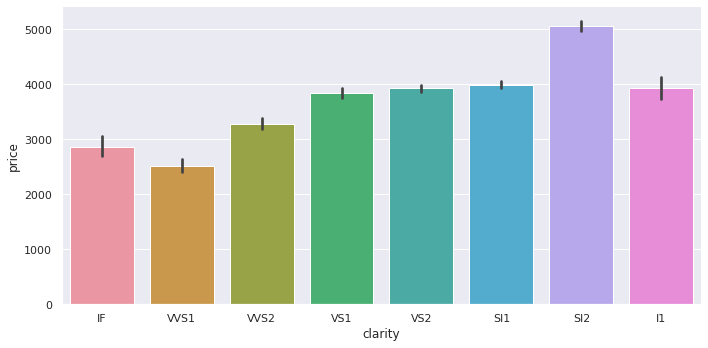

In [ ]:
catplot_by_price(col = 'clarity')

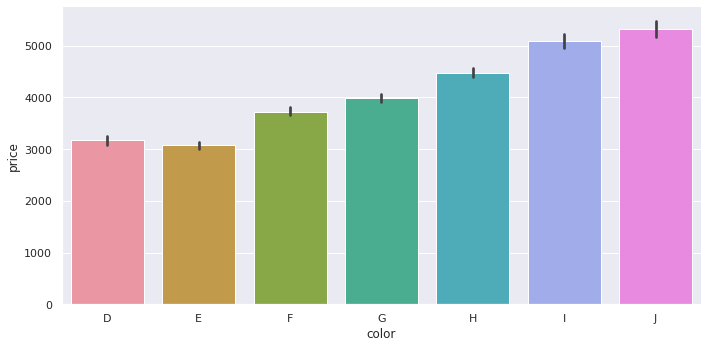

In [ ]:
catplot_by_price(col = 'color')

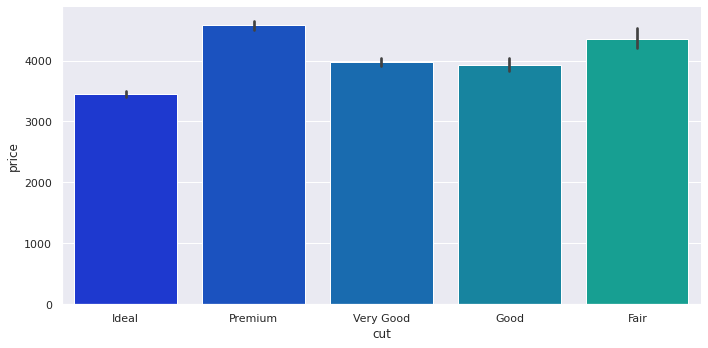

In [ ]:
catplot_by_price(col = 'cut')

# Clarity

In [ ]:
count(col = 'clarity')

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64


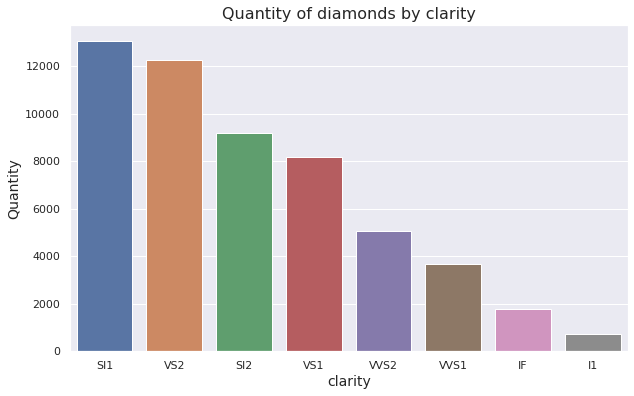

In [ ]:
plot_quantity(data = diamond, col = 'clarity')

It is possible to notice the decrease in diamonds' number with clarity.

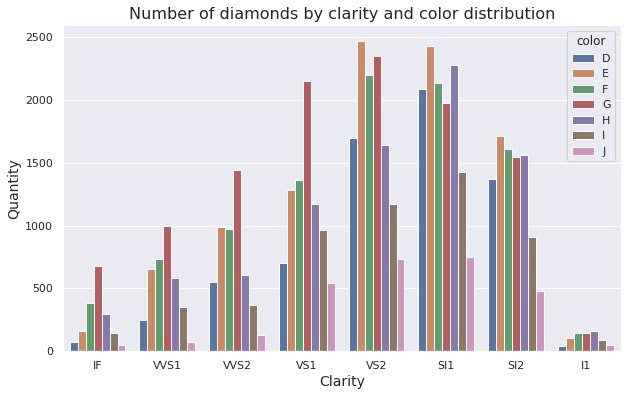

In [ ]:
quantity_diamonds_by_(data = diamond, col = 'clarity', hue = 'color')

There is a predominance of E and G colors in the cuts with the highest amounts of diamonds in the dataset, which is attenuated as these amounts decrease.

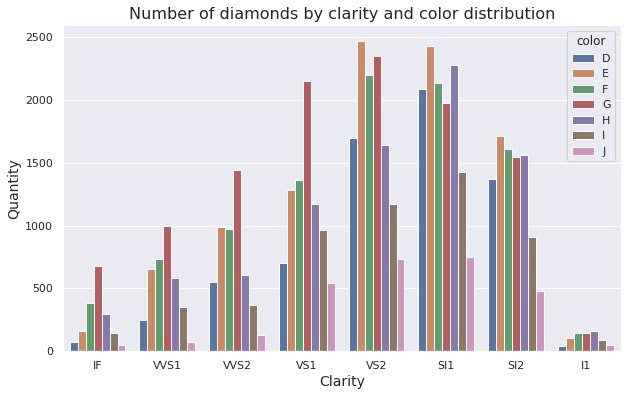

In [ ]:
quantity_diamonds_by_(data = diamond, col = 'clarity', hue = 'color')

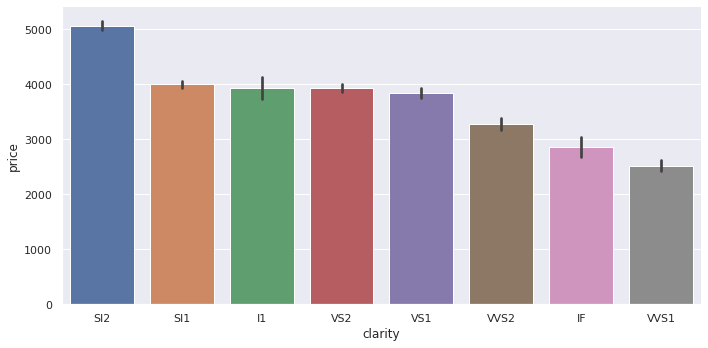

In [ ]:
order = ['SI2', 'SI1', 'I1', 'VS2', 'VS1', 'VVS2', 'IF', 'VVS1']
ax = sns.set(rc = {'figure.figsize': (10, 6)})
ax = sns.catplot(y = "price", x = "clarity", data = diamond, kind = 'bar', aspect = 2, order = order)
ax = ax

As we can see, the price decreases with the decrease of quality in clarity.

In [ ]:
mean_price_by_cathegory(data = diamond, col = 'clarity')

,clarity,mean price
0,SI2,5060.44
1,SI1,3994.11
2,I1,3926.19
3,VS2,3922.87
4,VS1,3839.14
5,VVS2,3283.74
6,IF,2864.84
7,VVS1,2519.51


In [ ]:
diamond_mean_price_by_clarity = mean_price_by_cathegory(data = diamond, col = 'clarity')

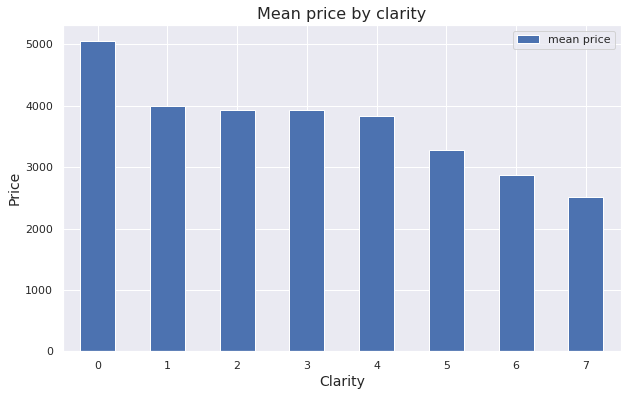

In [ ]:
diamond_mean_price_by_clarity.plot.bar()
plt.title("Mean price by clarity", fontsize = 16)
plt.xlabel("Clarity", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.xticks(rotation = 0)
plt.show()

In [ ]:
median_price_by_cathegory(data = diamond, col = 'clarity')

,clarity,median price
0,SI2,4072.0
1,I1,3346.0
2,SI1,2822.0
3,VS2,2052.0
4,VS1,2005.0
5,VVS2,1311.0
6,VVS1,1092.5
7,IF,1080.0


In [ ]:
diamond_median_price_by_clarity = median_price_by_cathegory(data = diamond, col = 'clarity')

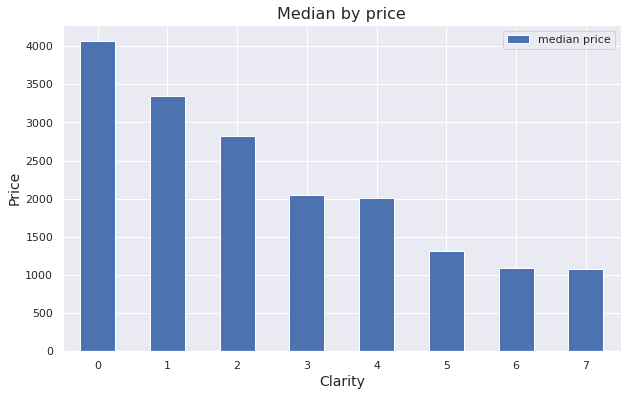

In [ ]:
diamond_median_price_by_clarity.plot.bar()
plt.title("Median by price", fontsize = 16)
plt.xlabel("Clarity", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.xticks(rotation = 0)
plt.show()

In [ ]:
std_price_by_cathegory(data = diamond, col = 'clarity')

,clarity,std of price
0,SI2,4256.94
1,VS2,4040.07
2,VS1,4011.89
3,IF,3920.25
4,VVS2,3821.65
5,SI1,3796.69
6,VVS1,3328.18
7,I1,2811.62


In [ ]:
diamond_std_price_by_clarity = std_price_by_cathegory(data = diamond, col = 'clarity')

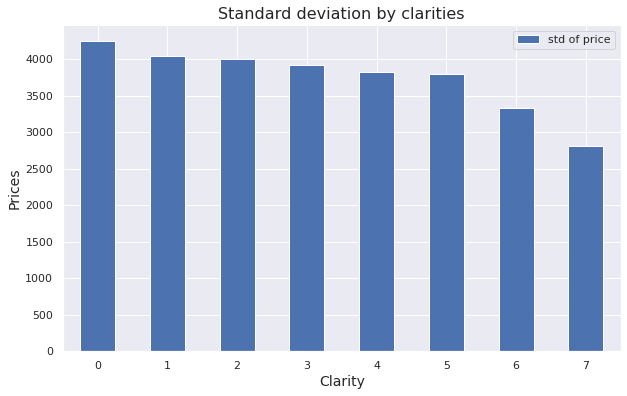

In [ ]:
diamond_std_price_by_clarity.plot.bar()
plt.title("Standard deviation by clarities", fontsize = 16)
plt.xlabel("Clarity", fontsize = 14)
plt.ylabel("Prices", fontsize = 14)
plt.xticks(rotation = 0)
plt.show()

# Cut

In [ ]:
count(col = 'cut')

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64


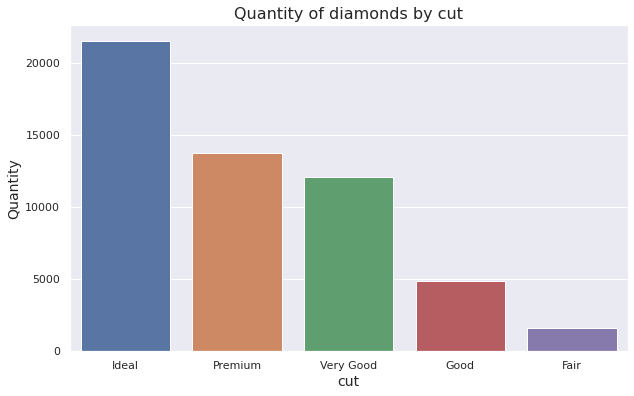

In [ ]:
plot_quantity(data = diamond, col = 'cut')

The diamonds quantity decreases with the quality of the cut.

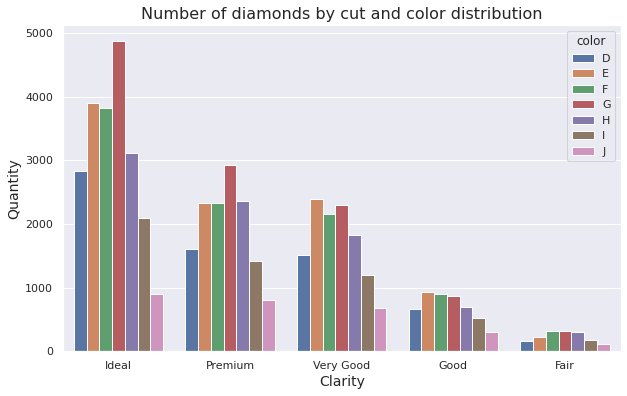

In [ ]:
quantity_diamonds_by_(data = diamond, col = 'cut', hue = 'color')

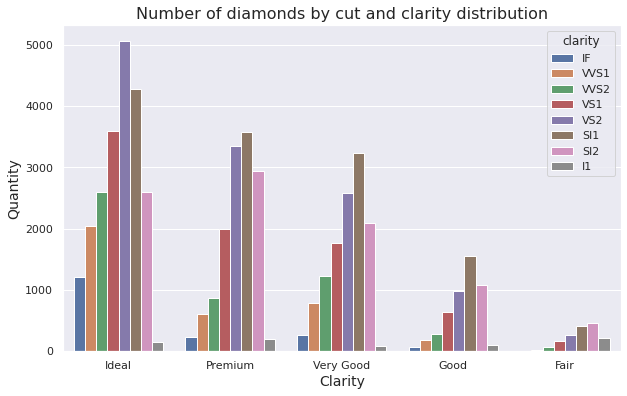

In [ ]:
quantity_diamonds_by_(data = diamond, col = 'cut', hue = 'clarity')

This is how the colors are distributed in relation to the types of cuts. There is a predominance of G and E colors in the first cuts and this behavior is accentuated along the distributions.

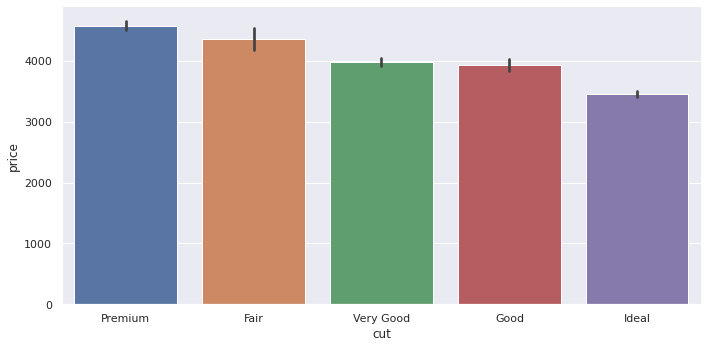

In [ ]:
order = ['Premium', 'Fair', 'Very Good', 'Good', 'Ideal']
ax = sns.set(rc = {'figure.figsize': (10, 6)})
ax = sns.catplot(y = "price", x = "cut", data = diamond, kind = 'bar', aspect = 2, order = order)
ax = ax

In [ ]:
mean_price_by_cathegory(data = diamond, col = 'cut')

,cut,mean price
0,Premium,4579.68
1,Fair,4357.50
2,Very Good,3981.66
3,Good,3926.40
4,Ideal,3456.94


In [ ]:
diamond_mean_price_by_cut = mean_price_by_cathegory(data = diamond, col = 'cut')

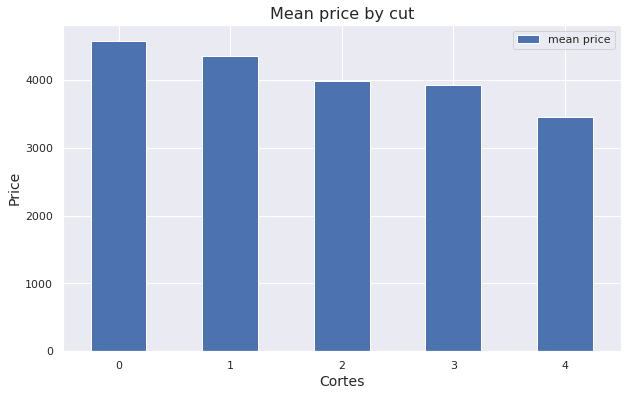

In [ ]:
diamond_mean_price_by_cut.plot.bar()
plt.title("Mean price by cut", fontsize = 16)
plt.xlabel("Cortes", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.xticks(rotation = 0)
plt.show()

In [ ]:
median_price_by_cathegory(data = diamond, col = 'cut')

,cut,median price
0,Fair,3282.0
1,Premium,3182.0
2,Good,3050.5
3,Very Good,2647.0
4,Ideal,1809.5


In [ ]:
diamond_median_price_by_cut = median_price_by_cathegory(data = diamond, col = 'cut')

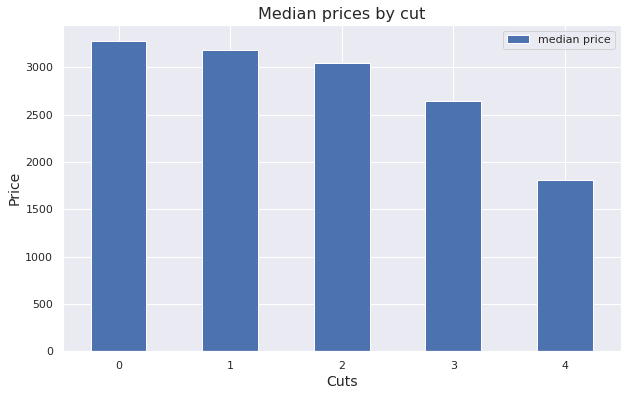

In [ ]:
diamond_median_price_by_cut.plot.bar()
plt.title("Median prices by cut", fontsize = 16)
plt.xlabel("Cuts", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.xticks(rotation = 0)
plt.show()

In [ ]:
std_price_by_cathegory(data = diamond, col = 'cut')

,cut,std of price
0,Premium,4343.91
1,Very Good,3936.01
2,Ideal,3808.09
3,Good,3676.77
4,Fair,3561.14


In [ ]:
diamond_std_price_by_cut = std_price_by_cathegory(data = diamond, col = 'cut')

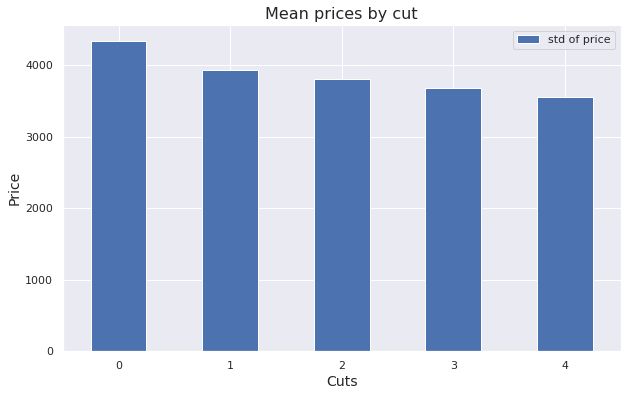

In [ ]:
diamond_std_price_by_cut.plot.bar()
plt.title("Mean prices by cut", fontsize = 16)
plt.xlabel("Cuts", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.xticks(rotation = 0)
plt.show()

As well as clarity, cut also intuitively has a linear relationship to price.

# Color

In [ ]:
count(col = 'color')

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64


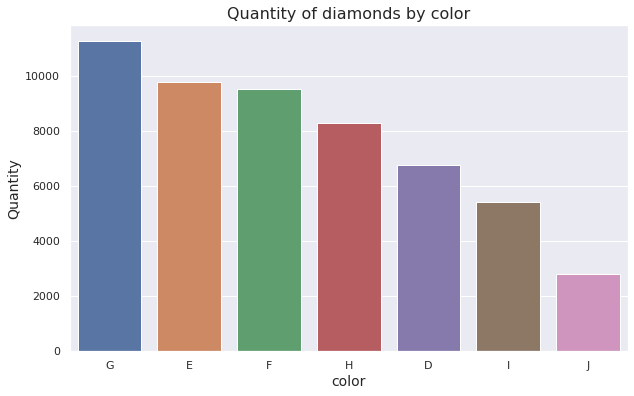

In [ ]:
plot_quantity(data = diamond, col = 'color')

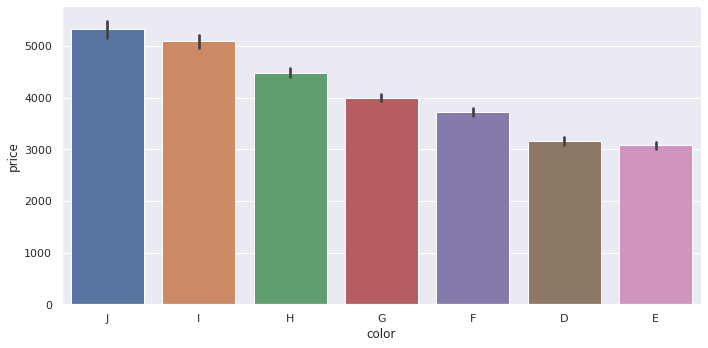

In [ ]:
order = ['J','I', 'H', 'G', 'F', 'D', 'E']
ax = sns.set(rc = {'figure.figsize': (10, 6)})
ax = sns.catplot(y = "price", x = "color", data = diamond, kind = 'bar', aspect = 2, order = order)
ax = ax

In [ ]:
mean_price_by_cathegory(data = diamond, col = 'color')

,color,mean price
0,J,5323.82
1,I,5089.97
2,H,4480.94
3,G,3996.88
4,F,3725.08
5,D,3168.11
6,E,3076.75


In [ ]:
diamond_mean_price_by_color = mean_price_by_cathegory(data = diamond, col = 'color')

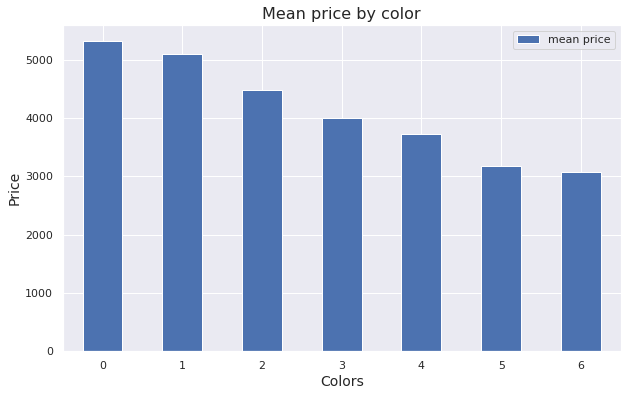

In [ ]:
diamond_mean_price_by_color.plot.bar()
plt.title("Mean price by color", fontsize = 16)
plt.xlabel("Colors", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.xticks(rotation = 0)
plt.show()

In [ ]:
median_price_by_cathegory(data = diamond, col = 'color')

,color,median price
0,J,4234.0
1,I,3730.0
2,H,3453.5
3,F,2343.5
4,G,2240.0
5,D,1836.5
6,E,1739.0


In [ ]:
diamond_median_price_by_color = median_price_by_cathegory(data = diamond, col = 'color')

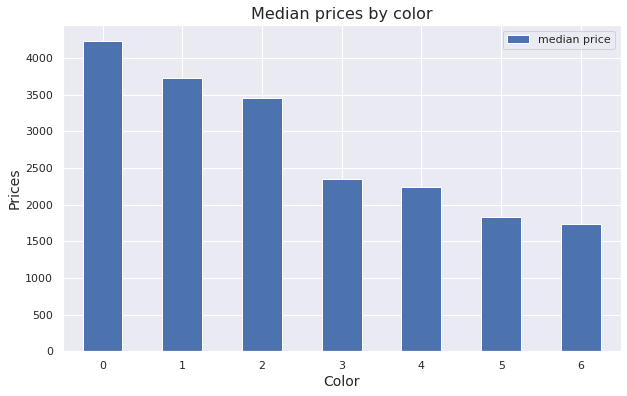

In [ ]:
diamond_median_price_by_color.plot.bar()
plt.title("Median prices by color", fontsize = 16)
plt.xlabel("Color", fontsize = 14)
plt.ylabel("Prices", fontsize = 14)
plt.xticks(rotation = 0)
plt.show()

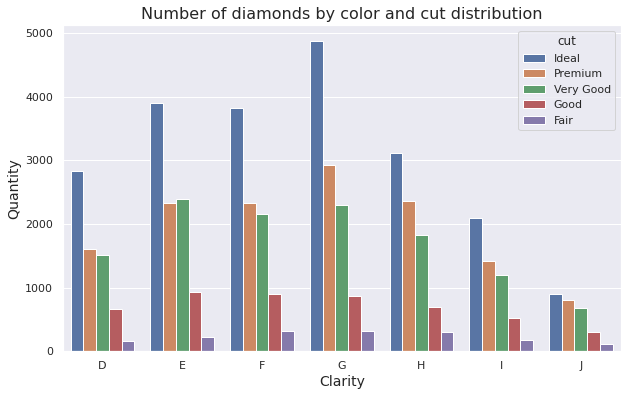

In [ ]:
quantity_diamonds_by_(data = diamond, col = 'color', hue = 'cut')

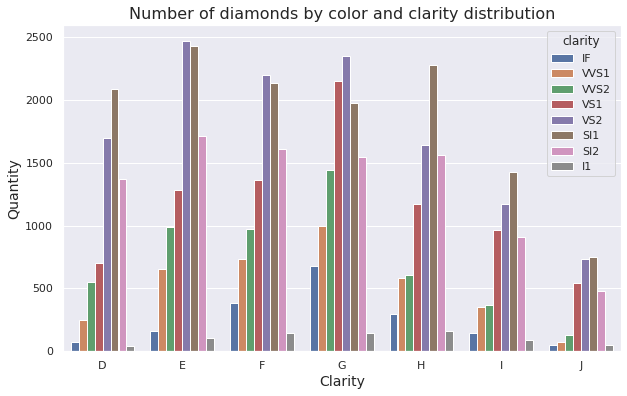

In [ ]:
quantity_diamonds_by_(data = diamond, col = 'color', hue = 'clarity')

In [ ]:
std_price_by_cathegory(data = diamond, col = 'color')

,color,std of price
0,I,4720.75
1,J,4438.19
2,H,4208.83
3,G,4049.17
4,F,3785.69
5,D,3353.39
6,E,3344.16


In [ ]:
diamond_std_price_by_color = std_price_by_cathegory(data = diamond, col = 'color')

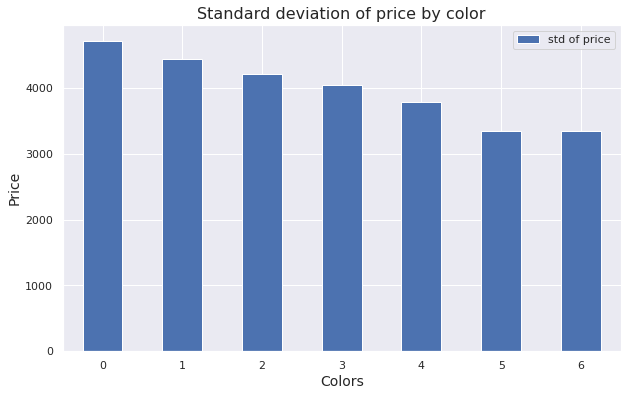

In [ ]:
diamond_std_price_by_color.plot.bar()
plt.title("Standard deviation of price by color", fontsize = 16)
plt.xlabel("Colors", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.xticks(rotation = 0)
plt.show()

As well as the two previous variables, color also shows a linear decrease with price.

# Obtaining the correlations between the variables

Considering that the descriptive statistics have linear relationships with the price, we will check the correlations between the variables and test the hypothesis raised by the study of the graphs.

In [ ]:
correlation = diamond.corr().round(4)
correlation

,carat,depth,table,price,x,y,z
carat,1.0000,0.0283,0.1816,0.9216,0.9778,0.9540,0.9610
depth,0.0283,1.0000,-0.2957,-0.0107,-0.0250,-0.0291,0.0950
table,0.1816,-0.2957,1.0000,0.1272,0.1961,0.1845,0.1525
price,0.9216,-0.0107,0.1272,1.0000,0.8872,0.8679,0.8682
x,0.9778,-0.0250,0.1961,0.8872,1.0000,0.9749,0.9754
y,0.9540,-0.0291,0.1845,0.8679,0.9749,1.0000,0.9567
z,0.9610,0.0950,0.1525,0.8682,0.9754,0.9567,1.0000


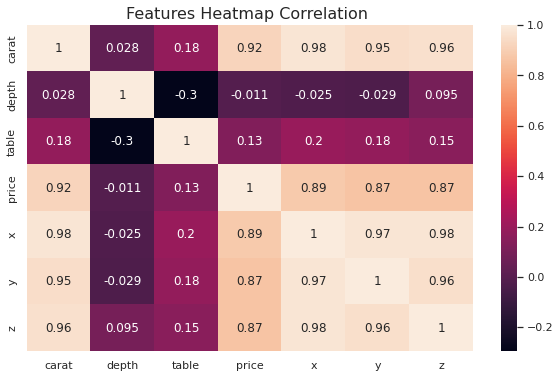

In [ ]:
ax = sns.set(rc = {'figure.figsize': (10, 6)})
ax = sns.heatmap(data = correlation, annot = True)
ax.set_title('Features Heatmap Correlation ', fontsize = 16)
ax = ax

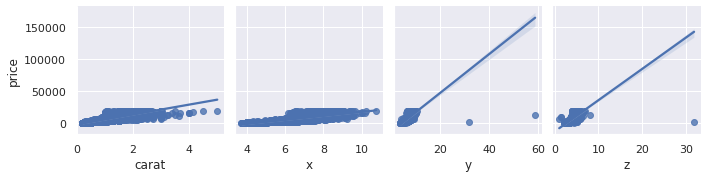

In [ ]:
ax = sns.set(rc = {'figure.figsize': (10, 6)})
ax = sns.pairplot(data = diamond, y_vars = 'price', x_vars = ['carat', 'x', 'y', 'z'], kind = 'reg')

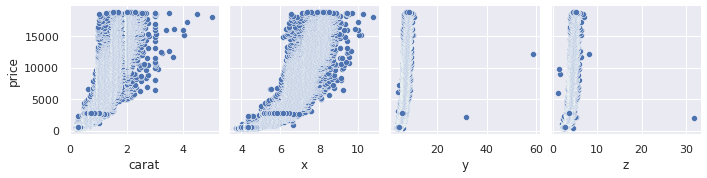

In [ ]:
ax = sns.set(rc = {'figure.figsize': (10, 6)})
ax = sns.pairplot(data = diamond, y_vars = 'price', x_vars = ['carat', 'x', 'y', 'z'], kind = 'scatter')

In fact, it is possible to notice a strong correlation between the variables carat, x, y and z with the price as seen in the heatmap and by analyzing the regression lines of the variables in relation to the price.

# Frequency Distributions

Let us now study the distribution of diamonds present in the dataset with respect to the variables carat and depth.

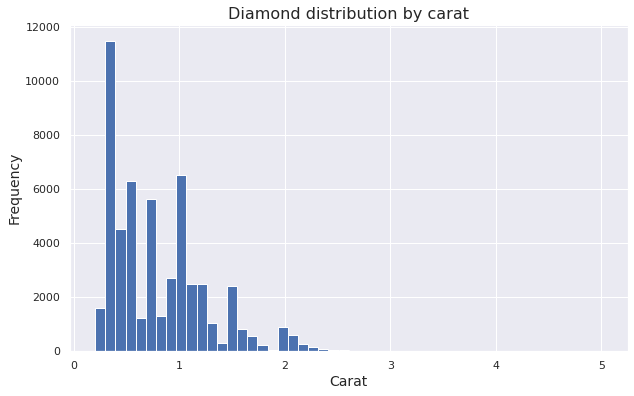

In [ ]:
plt.figure(figsize = (10, 6))
plt.hist(diamond['carat'], bins = 50)
plt.xlabel('Carat', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Diamond distribution by carat', fontsize = 16)
plt.show()

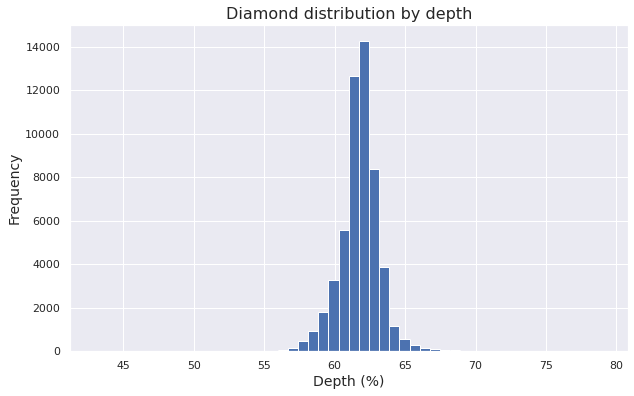

In [ ]:
plt.figure(figsize = (10, 6))
plt.hist(diamond['depth'], bins = 50)
plt.xlabel('Depth (%)', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Diamond distribution by depth', fontsize = 16)
plt.show()

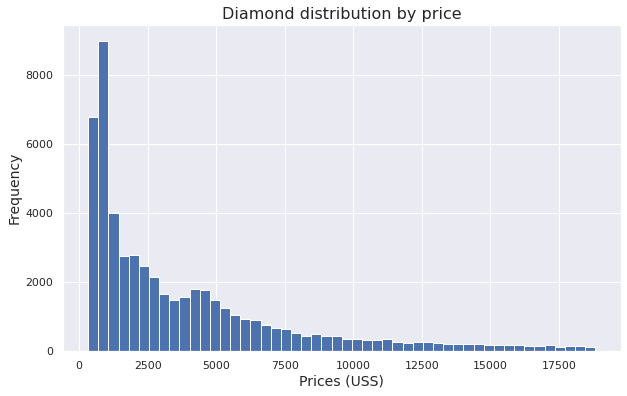

In [ ]:
plt.figure(figsize = (10, 6))
plt.hist(diamond['price'], bins = 50)
plt.xlabel('Prices (USS)', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Diamond distribution by price', fontsize = 16)
plt.show()

# Linear regression model

Finding a high correlation with price and variables, let's use Python's sklearn library to try to predict price values ​​with respect to these variables.

In [ ]:
X1 = diamond[['carat', 'x', 'y', 'z']]
y1 = diamond[['price']]

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 2811)

In [ ]:
model1 = LinearRegression()

In [ ]:
model1.fit(X1_train, y1_train)

LinearRegression()

In [ ]:
model1.score(X1_train, y1_train)

0.854447408279517

In [ ]:
model1.score(X1_test, y1_test)

0.8554956357389182

In [ ]:
train_LR_accuracy = model1.score(X1_train, y1_train)
test_LR_accuracy = model1.score(X1_test, y1_test)

In [ ]:
percentage_test_LR_accuracy = (model1.score(X1_test, y1_test)) * 100

In [ ]:
print('Training Accuracy: {:.2f}%'.format((train_LR_accuracy) * 100))
print('Test Accuracy: {:.2f}%'.format((test_LR_accuracy) * 100))

Training Accuracy: 85.44%
Test Accuracy: 85.55%


# "Linearized" Linear Regression Model

It is possible to improve the accuracy of our model by linearizing the variables using the logarithm function as follows:

In [ ]:
diamond['log_price'] = np.log(diamond['price'])
diamond['log_carat'] = np.log(diamond['carat'])
diamond['log_x'] = np.log(diamond['x'])
diamond['log_y'] = np.log(diamond['y'])
diamond['log_z'] = np.log(diamond['z'])

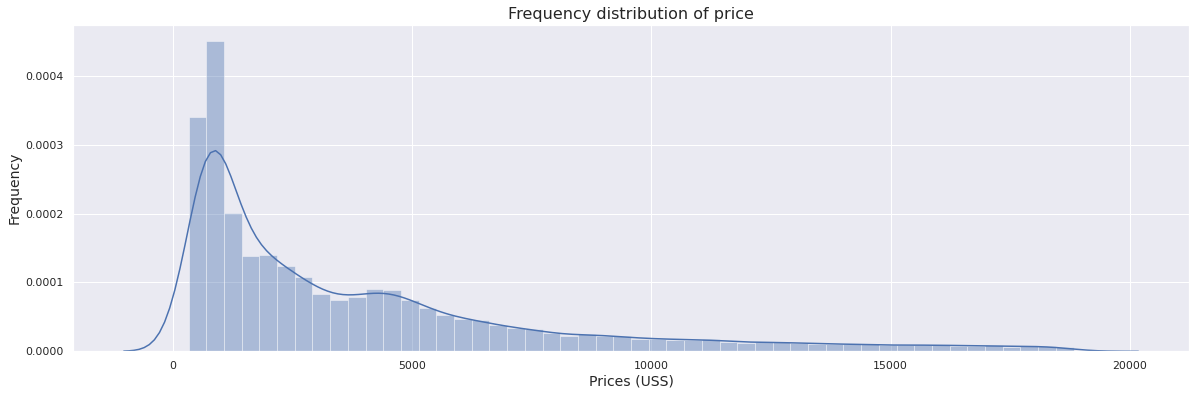

In [ ]:
ax = sns.distplot(diamond['price'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Frequency distribution of price', fontsize = 16)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_xlabel('Prices (USS)', fontsize = 14)
ax = ax

This is the price distribution before linearizing.

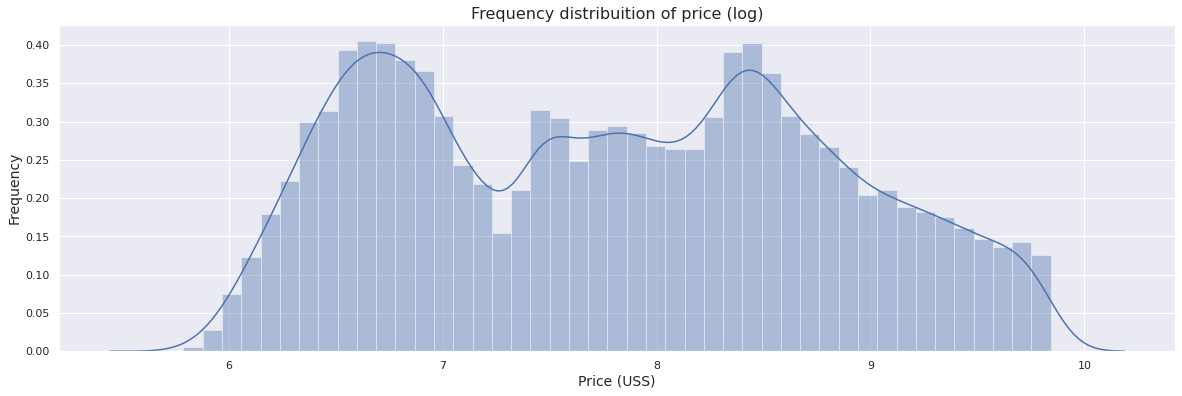

In [ ]:
ax = sns.distplot(diamond['log_price'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Frequency distribuition of price (log)', fontsize = 16)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_xlabel('Price (USS)', fontsize = 14)
ax = ax

This is the distribution of prices after linearization, much closer to a normal distribution than in the previous case.

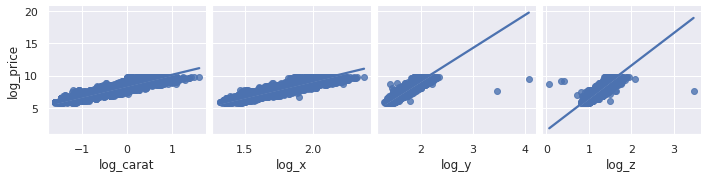

In [ ]:
ax = sns.set(rc = {'figure.figsize': (10, 6)})
ax = sns.pairplot(data = diamond, y_vars = 'log_price', x_vars = ['log_carat', 'log_x', 'log_y', 'log_z'], kind = 'reg')

In [ ]:
X2 = diamond[['log_carat', 'log_x', 'log_y', 'log_z']]
y2 = diamond[['log_price']]

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 2811)

In [ ]:
model2 = LinearRegression()

In [ ]:
model2.fit(X2_train, y2_train)

LinearRegression()

In [ ]:
model2.score(X2_train, y2_train)

0.9343311585654025

In [ ]:
model2.score(X2_test, y2_test)

0.9345009465447237

In [ ]:
percentage_model2_train = (model2.score(X2_train, y2_train) * 100).round(2)
percentage_model2_test = (model2.score(X2_test, y2_test) * 100).round(2)

In [ ]:
print('The accuracy of the linearized model in the training data was {}%.'.format(percentage_model2_train))
print('The accuracy of the linearized model in the testing data was {}%.'.format(percentage_model2_test))

The accuracy of the linearized model in the training data was 93.43%.
The accuracy of the linearized model in the testing data was 93.45%.


## Comparing the models

In [ ]:
variation = (percentage_model2_test - percentage_test_LR_accuracy).round(2)

In [ ]:
print('The accuracy of the model was increased by {}%.'.format(variation))

The accuracy of the model was increased by 7.9%.
